https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
https://youtu.be/NEaUSP4YerM?t=641
https://youtu.be/GBUEjkpoxXc?list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&t=1441

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()



Using TensorFlow backend.


In [34]:

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [35]:
X = x_train / 255.0
y = y_train

In [36]:
X = X.reshape(X.shape[0],X.shape[1]*X.shape[2])
X.shape

(60000, 784)

In [37]:
import pandas as pd

feat_cols = [ 'pixel_'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

In [38]:
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [7]:
df.shape

(60000, 785)

In [8]:
import numpy as np
rndperm = np.random.permutation(df.shape[0])
rndperm

array([12577, 45749, 18212, ..., 11195,  3370, 56138])

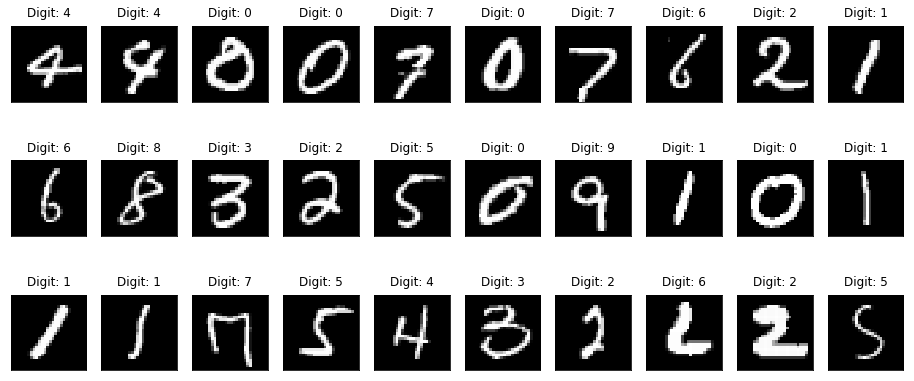

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
df[feat_cols].values.shape

(60000, 784)

# pca

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)


In [12]:
pca_result.shape

(60000, 3)

In [13]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

In [14]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,pca-one,pca-two,pca-three
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,0.486009,-1.226181,-0.096282
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,3.967523,-1.156278,2.338605
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,-0.203332,1.537914,-0.739256
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-3.133831,-2.381193,1.073140
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9,-1.501000,2.864923,0.064128
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0.723407,0.868012,2.318934
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-2.849074,-0.615646,-0.973302
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,2.013117,-1.218711,-0.408218
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-3.407477,-0.319792,-0.523190
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,-1.195022,1.825860,2.715249


In [15]:
pca.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089])

In [16]:
df_select = df.loc[rndperm[:3000],:]
df_select

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,pca-one,pca-two,pca-three
12577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,-1.419391,1.852433,1.843196
45749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,0.302166,2.478372,1.581392
18212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5.125372,-2.499053,-0.892408
21747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,3.754501,-0.597802,0.811394
1499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7,-1.482037,2.016338,1.989875
10456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5.015852,0.097315,1.700743
36105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7,-0.289027,2.385649,0.918456
36067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,-2.080620,-1.603897,0.944770
54454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,-0.463733,-2.522516,-1.481732
59697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-3.757384,-2.659335,0.574472


In [17]:

groups = list(df_select.label.value_counts().index)
groups.sort()
groups

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

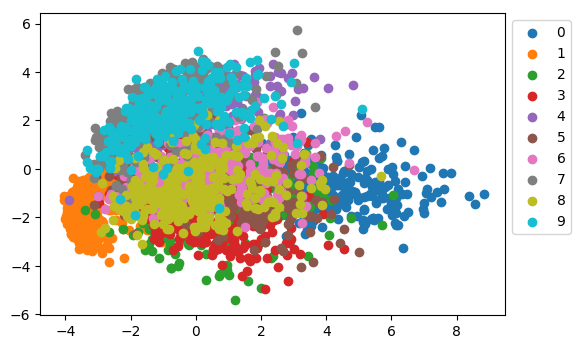

In [18]:
plt.figure(figsize=(6, 4),dpi= 100)

for group in groups:
    df_dummy = df_select[df_select.label==group]
    x = df_dummy['pca-one'].values
    y = df_dummy['pca-two'].values
    color = 'C'+group
    plt.scatter(x, y, c=color, label=group)
    
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

# t-sne

In [19]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform( df.loc[ rndperm[:n_sne],feat_cols ].values )

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.420s...
[t-SNE] Computed neighbors for 7000 samples in 57.270s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.226142
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.782280
[t-SNE] KL divergence after 300 iterations: 2.448941


In [20]:
tsne_results.shape

(7000, 2)

In [21]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel780,pixel781,pixel782,pixel783,label,pca-one,pca-two,pca-three,x-tsne,y-tsne
12577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,-1.419391,1.852433,1.843196,0.246584,-4.338470
45749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,0.302166,2.478372,1.581392,-0.539900,-7.014240
18212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,5.125372,-2.499053,-0.892408,0.965746,9.722590
21747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,3.754501,-0.597802,0.811394,-1.328951,10.370112
1499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7,-1.482037,2.016338,1.989875,-2.901799,-9.899456
10456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,5.015852,0.097315,1.700743,-1.321452,8.156820
36105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7,-0.289027,2.385649,0.918456,-1.789277,-11.262819
36067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6,-2.080620,-1.603897,0.944770,5.027465,7.076121
54454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,-0.463733,-2.522516,-1.481732,-8.044183,2.536213
59697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,-3.757384,-2.659335,0.574472,-10.219697,-0.835265


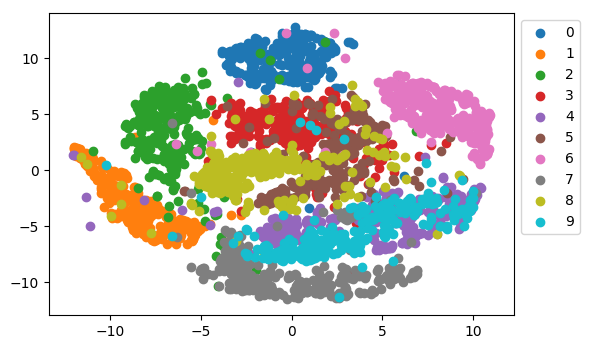

In [22]:
df_select = df_tsne.loc[rndperm[:3000],:]
df_select
groups = list(df_select.label.value_counts().index)
groups.sort()
groups

plt.figure(figsize=(6, 4),dpi= 100)

for group in groups:
    df_dummy = df_select[df_select.label==group]
    x = df_dummy['x-tsne'].values
    y = df_dummy['y-tsne'].values
    color = 'C'+group
    plt.scatter(x, y, c=color, label=group)
    
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

# pca + t-sne

In [51]:
from sklearn.decomposition import PCA

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)

In [52]:
pca_result_50.shape

(60000, 50)

In [57]:
n_sne = 7000
random_index_list = rndperm[:n_sne]
arr_tsne = pca_result_50[random_index_list]
arr_tsne.shape

(7000, 50)

In [53]:
np.sum(pca_50.explained_variance_ratio_)

0.8246224765649077

In [58]:
import time

from sklearn.manifold import TSNE


time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(  arr_tsne )

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.024s...
[t-SNE] Computed neighbors for 7000 samples in 4.519s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 1.957111
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.788170
[t-SNE] KL divergence after 300 iterations: 2.402507


In [64]:
tsne_results.shape


(7000, 2)

In [61]:
df_pca_tsne = df.loc[random_index_list].copy()
df_pca_tsne['x-tsne'] = tsne_results[:,0]
df_pca_tsne['y-tsne'] = tsne_results[:,1]
df_pca_tsne

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label,x-tsne,y-tsne
12577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,-4.002604,-0.098019
45749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,-6.234227,-2.019741
18212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.114396,4.902873
21747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10.606016,2.886483
1499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,-9.025912,-4.511197
10456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8.761225,2.197545
36105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,-10.866517,-3.664173
36067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,0.422451,5.611581
54454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3.848920,-7.768864
59697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.916934,-10.894047


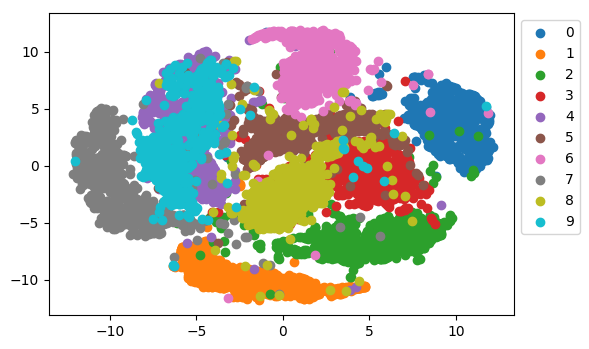

In [67]:
df_select = df_pca_tsne

groups = list(df_select.label.value_counts().index)
groups.sort()
groups

plt.figure(figsize=(6, 4),dpi= 100)

for group in groups:
    df_dummy = df_select[df_select.label==group]
    x = df_dummy['x-tsne'].values
    y = df_dummy['y-tsne'].values
    color = 'C'+group
    plt.scatter(x, y, c=color, label=group)
    
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()